<a href="https://colab.research.google.com/github/hoya9802/ComputerVision/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
colorimg = np.zeros((10, 10, 3)).astype('uint8')
colorimg[:5, :5, :] = 255
colorimg[:5, 5:, 0] = 255
colorimg[5:, :5, 1] = 255
colorimg[5:, 5:, 2] = 255

print('sum of color image:', np.sum(colorimg))

upsampled = cv2.resize(colorimg, (500, 500), interpolation=cv2.INTER_LINEAR)
print('sum of upsampled color image:', np.sum(upsampled))
cv2.imwrite('upsampledColorimg.jpg', upsampled)
cv2_imshow(colorimg)

sum of color image: 38250
sum of upsampled color image: 95618334


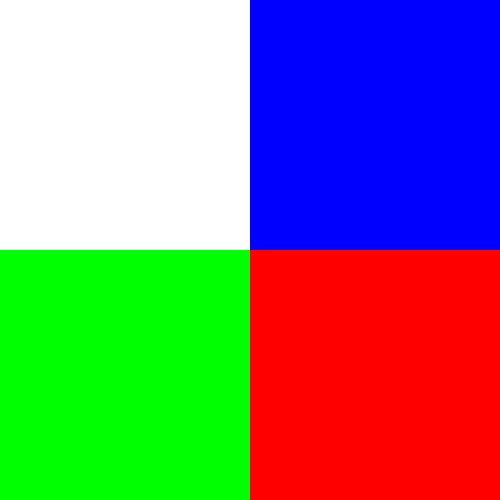

total BGR pixels of resolution 500x500 95625000


In [ ]:
resimg500 = np.zeros((500,500,3)).astype('uint8')
for i in range(500):
  for j in range(500):
    for k in range(3):
      if i < 250:
        if j < 250:
          resimg500[i,j,k] = 255
        else:
          resimg500[i,j,0] = 255
      else:
        if j < 250:
          resimg500[i,j,1] = 255
        else:
          resimg500[i,j,2] = 255


cv2_imshow(resimg500)
print('total BGR pixels of resolution 500x500', sum(resimg500.reshape(500*500*3)))

In [ ]:
grayimg = np.zeros((10,10)).astype('uint8')

for i in range(10):
  for j in range(10):
    grayimg[i,j] += round(0.299*colorimg[i,j,2])
    grayimg[i,j] += round(0.587*colorimg[i,j,1])
    grayimg[i,j] += round(0.114*colorimg[i,j,0])

cv2.imwrite('grayimg.jpg', grayimg)
print(grayimg)

[[255 255 255 255 255  29  29  29  29  29]
 [255 255 255 255 255  29  29  29  29  29]
 [255 255 255 255 255  29  29  29  29  29]
 [255 255 255 255 255  29  29  29  29  29]
 [255 255 255 255 255  29  29  29  29  29]
 [150 150 150 150 150  76  76  76  76  76]
 [150 150 150 150 150  76  76  76  76  76]
 [150 150 150 150 150  76  76  76  76  76]
 [150 150 150 150 150  76  76  76  76  76]
 [150 150 150 150 150  76  76  76  76  76]]


## Histogram Equalization

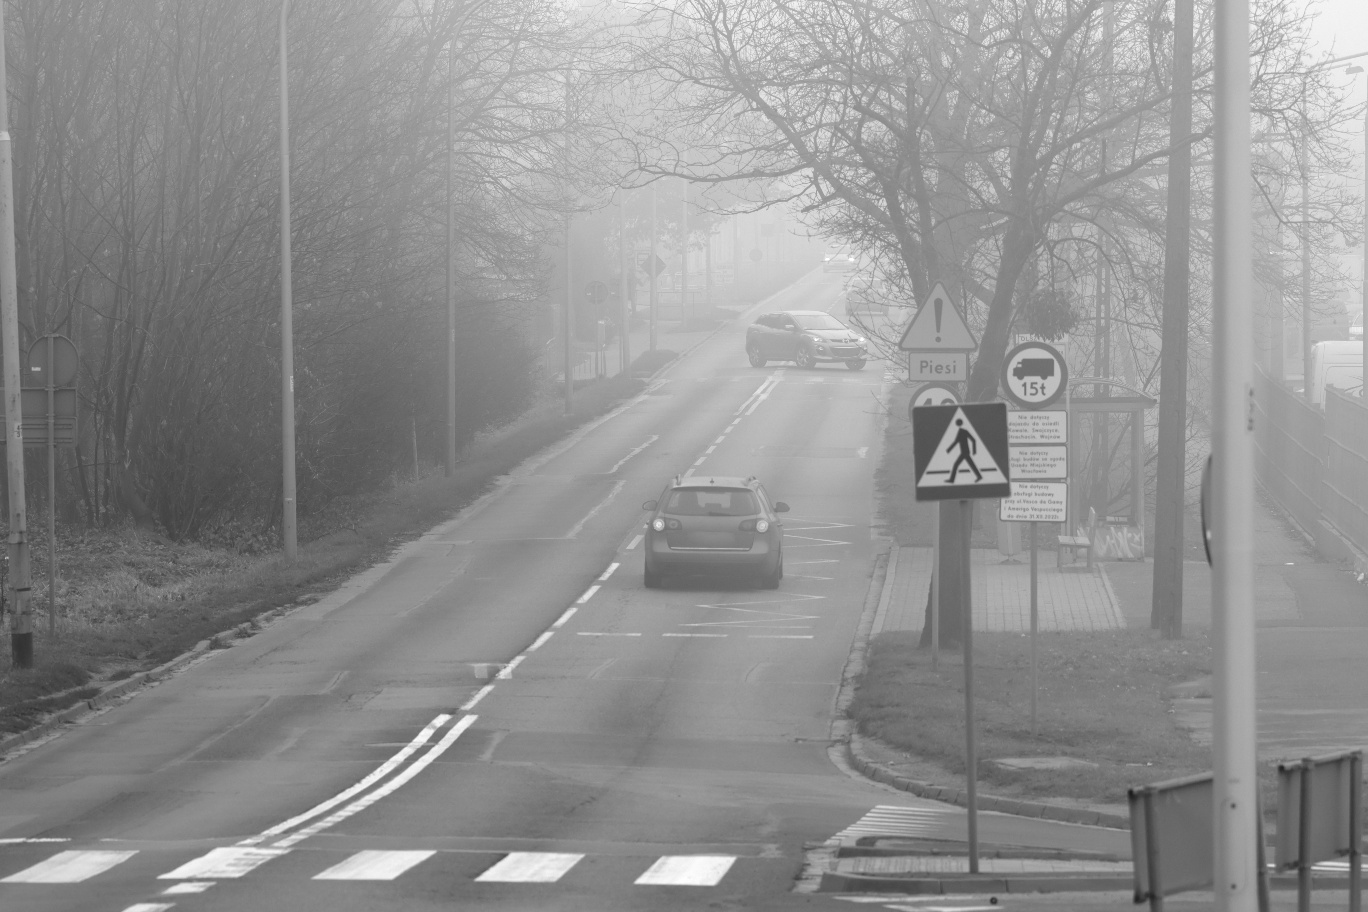

<BarContainer object of 256 artists>

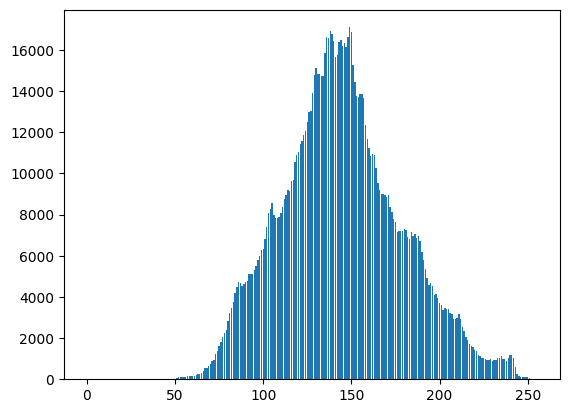

In [ ]:
input_color_img = cv2.imread("/content/drive/MyDrive/Computer_Vision/data/mistyroad.jpeg")
height, width, _ = input_color_img.shape
input_gray_img = cv2.cvtColor(input_color_img, cv2.COLOR_BGR2GRAY)

cv2_imshow(input_gray_img)

histogram = np.zeros((256))

for i in range(height):
    for j in range(width):
        histogram[int(input_gray_img[i][j])] += 1

import matplotlib.pyplot as plt
plt.bar(range(len(histogram)), histogram)

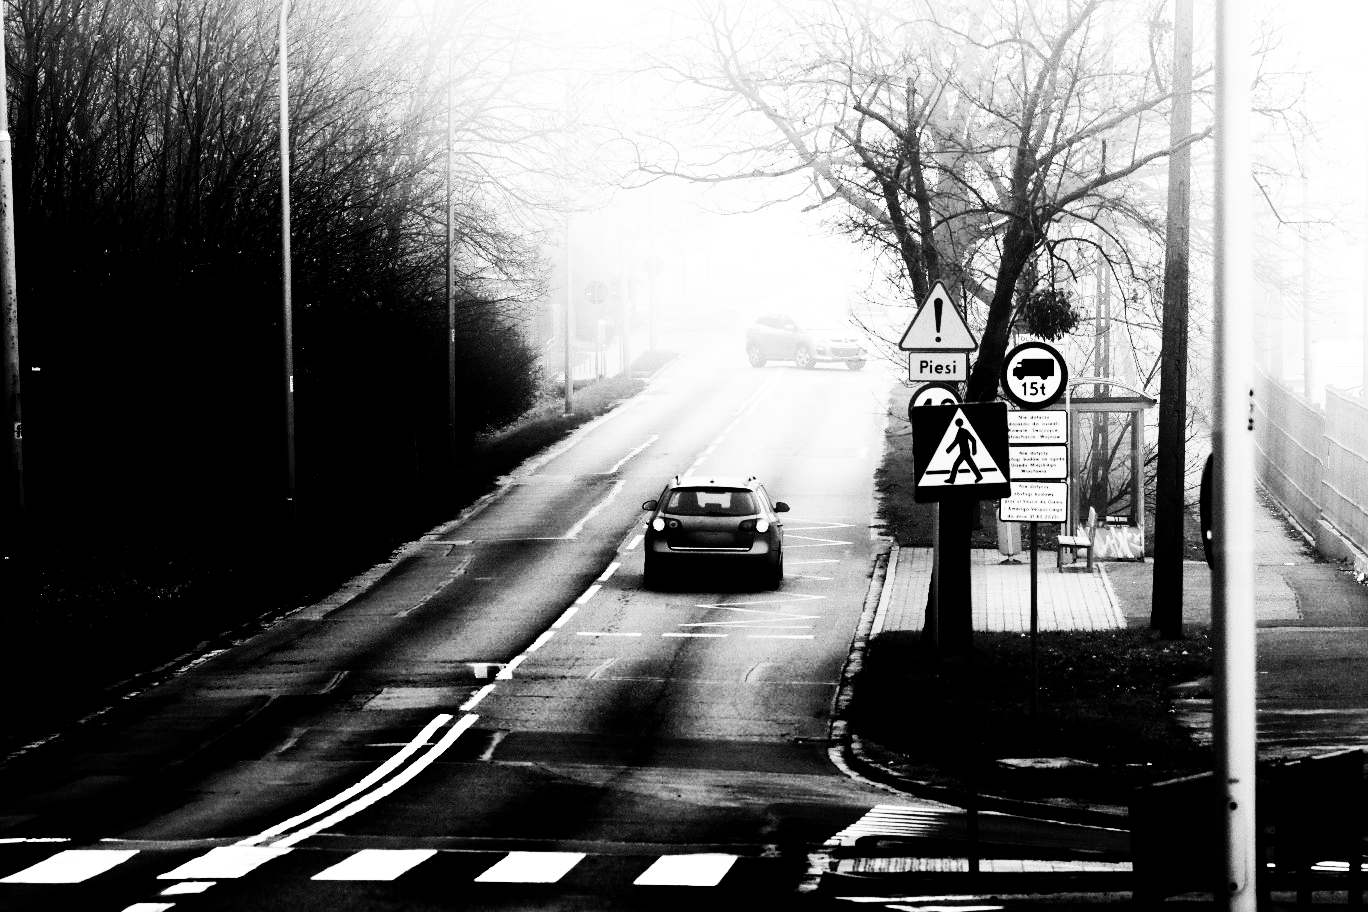

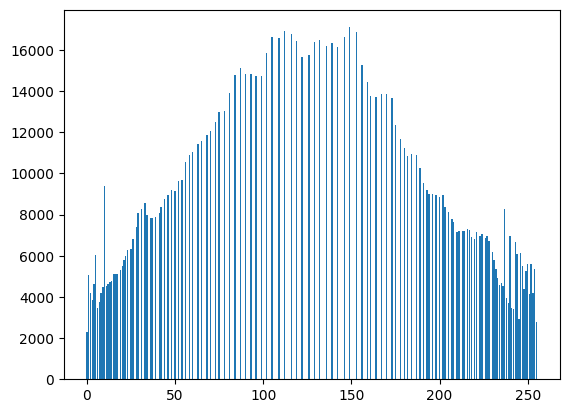

In [ ]:
clin = 0
equalizedHist = np.zeros((256))
hisMatch = np.zeros((256))
for i in range(len(histogram)):
  clin += histogram[i]
  hisMatch[i] = round(clin / (912*1368) * 255)

for i in range(height):
    for j in range(width):
        input_gray_img[i][j] = hisMatch[input_gray_img[i][j]]

for i in range(height):
    for j in range(width):
        equalizedHist[int(input_gray_img[i][j])] += 1

plt.bar(range(len(equalizedHist)), equalizedHist)

equalizedimg = np.zeros((height,width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        equalizedimg[i][j] = hisMatch[input_gray_img[i][j]]

cv2_imshow(equalizedimg)

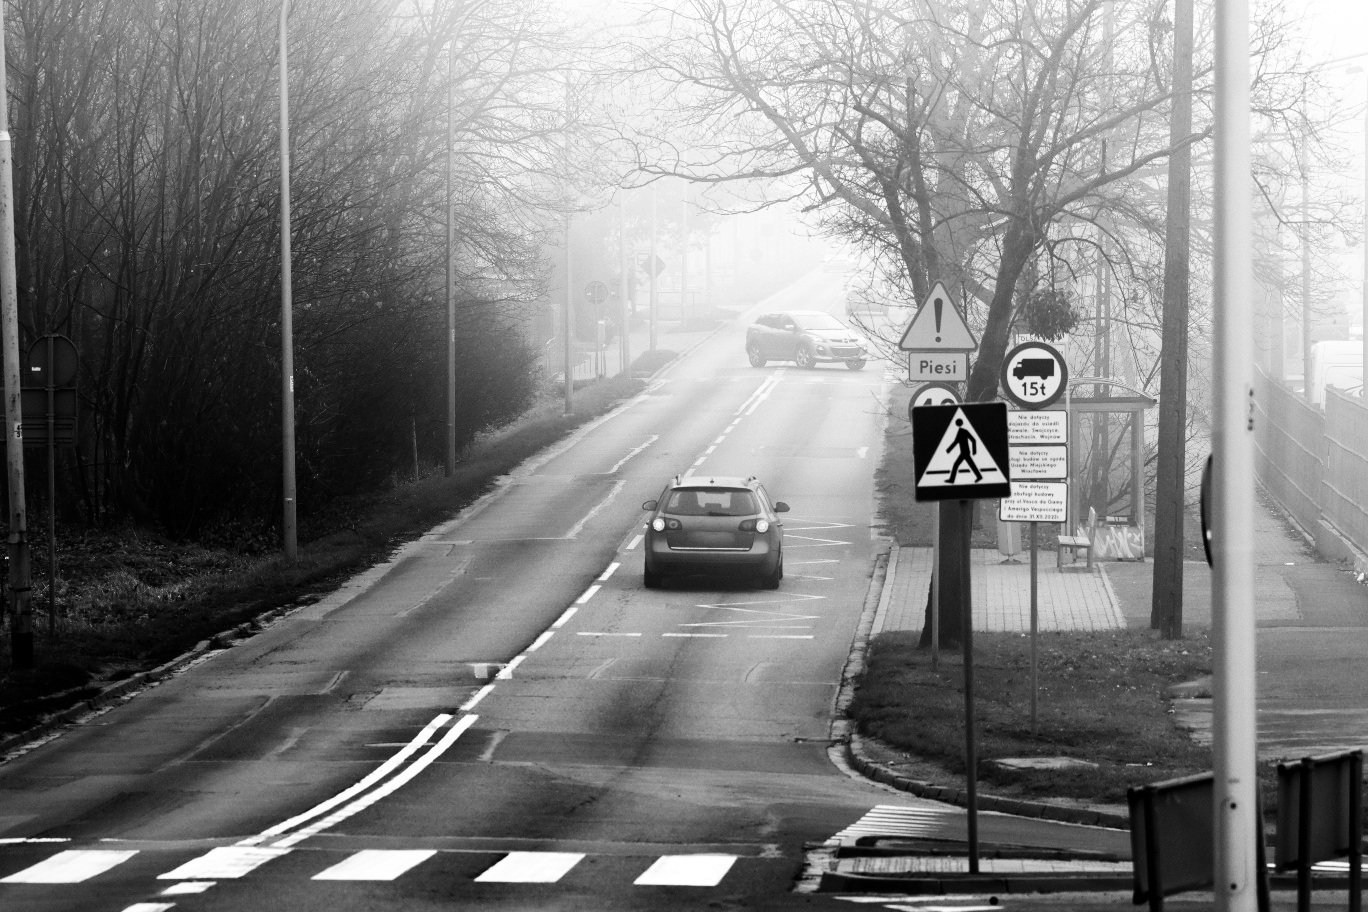

<BarContainer object of 256 artists>

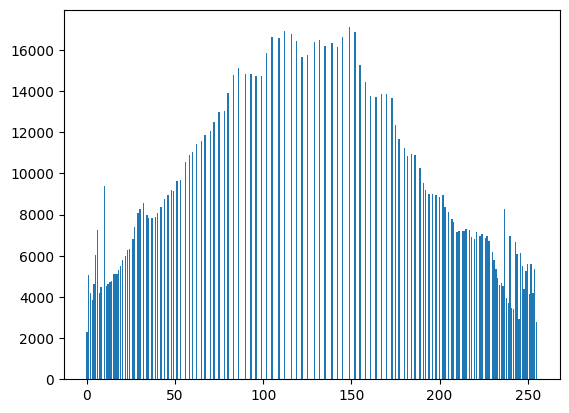

In [ ]:
dst = cv2.equalizeHist(input_gray_img)
hist = cv2.calcHist([dst], [0], None, [256], [0,256])
cv2_imshow(dst)
plt.bar(range(len(hist.reshape(256))), hist.reshape(256))

## Histogram Backprojection

In [ ]:
Hue = list()
Saturation = list()
Value = list()
tmpimg = np.zeros((1,1,3), dtype=np.uint8)
print(tmpimg.shape)
for blue in range(256):
  for green in range(256):
    for red in range(256):
      tmpimg[:,:,0] = blue
      tmpimg[:,:,1] = green
      tmpimg[:,:,2] = red
      h, s, v = cv2.cvtColor(tmpimg, cv2.COLOR_BGR2HSV)[0,0]
      Hue.append(h)
      Saturation.append(s)
      Value.append(v)

(1, 1, 3)


In [ ]:
print('HSV Color max value:', max(Hue), max(Saturation), max(Value))
print('HSV Color min value:', min(Hue), min(Saturation), min(Value))
MAX_H = max(Hue) + 1
MAX_S = max(Saturation) + 1

HSV Color max value: 179 255 255
HSV Color min value: 0 0 0


Cropped BGR image shape: (40, 43, 3)
Cropped HSV image shape: (40, 43, 3)

Source original BGR image


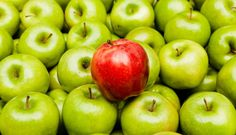


Cropped source


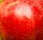


Cropped source HSV image


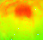

In [ ]:
ori_img = cv2.imread("/content/drive/MyDrive/Computer_Vision/data/apple.jpeg")
crop_img = ori_img[(ori_img.shape[0]//2)-20:(ori_img.shape[0]//2)+20,(ori_img.shape[1]//2)-21:(ori_img.shape[1]//2)+22]

crop_HSV_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)

print('Cropped BGR image shape:', crop_img.shape)
print('Cropped HSV image shape:', crop_HSV_img.shape)
print()
print('Source original BGR image')
cv2_imshow(ori_img)
print()
print('Cropped source')
cv2_imshow(crop_img)
print()
print('Cropped source HSV image')
cv2_imshow(crop_HSV_img)

Created HS histogram model


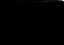


Resized HS histogram model


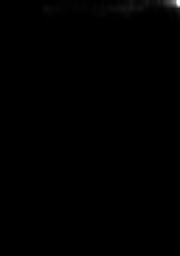


Element wise HS histogram model
[[  0.   0.   0. ... 107. 141. 357.]
 [  0.   0.   0. ...  13.  23.  37.]
 [  0.   0.   0. ...   4.   3.  15.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   3.   1.]]


In [ ]:
HS_model = np.zeros((MAX_H//4, MAX_S//4))

height, width, hsv = crop_HSV_img.shape
for j in range(height):
  for i in range(width):
    hue, saturation, _ = crop_HSV_img[j, i]
    HS_model[hue//4, saturation//4] += 1

norm_HS_model = HS_model/(height*width)

print('Created HS histogram model')
cv2_imshow(HS_model)

print()
print('Resized HS histogram model')
cv2_imshow(cv2.resize(HS_model, (MAX_H,MAX_S)))

print()
print("Element wise HS histogram model")
print(HS_model)

source image


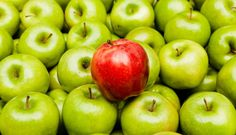


Created HS histogram map


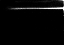


Resized HS histogram map


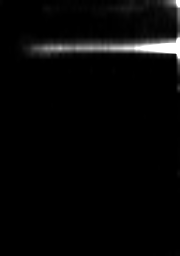

In [ ]:
src_HS_map = np.zeros((MAX_H//4, MAX_S//4))
src_HSV_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)
height, width, hsv = src_HSV_img.shape

for j in range(height):
  for i in range(width):
    h, s, v = src_HSV_img[j,i]
    src_HS_map[h//4, s//4] += 1

norm_src_HS_map = src_HS_map/(height*width)

print('source image')
cv2_imshow(ori_img)

print()
print('Created HS histogram map')
cv2_imshow(src_HS_map)

print()
print('Resized HS histogram map')
cv2_imshow(cv2.resize(src_HS_map, (MAX_H, MAX_S)))

Back project result image


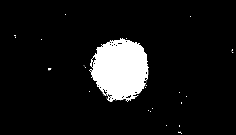


image created using back project as a mask


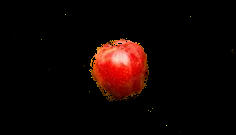

In [ ]:
height, width, bgr = ori_img.shape
res_binary = np.zeros((height, width))

for j in range(height):
  for i in range(width):
    h, s, v = src_HSV_img[j, i]
    if norm_src_HS_map[h//4, s//4]:
      conf = norm_HS_model[h//4, s//4]/norm_src_HS_map[h//4, s//4]
      res_binary[j, i] = min(conf, 1.0)
    else:
      res_binary[j, i] = 0

res_color_img = np.zeros((height, width, bgr))
for j in range(height):
  for i in range(width):
    if res_binary[j, i]:
      res_color_img[j, i, :] = ori_img[j,i,:]

print('Back project result image')
cv2_imshow(res_binary*255)
print()
print('image created using back project as a mask')
cv2_imshow(res_color_img)

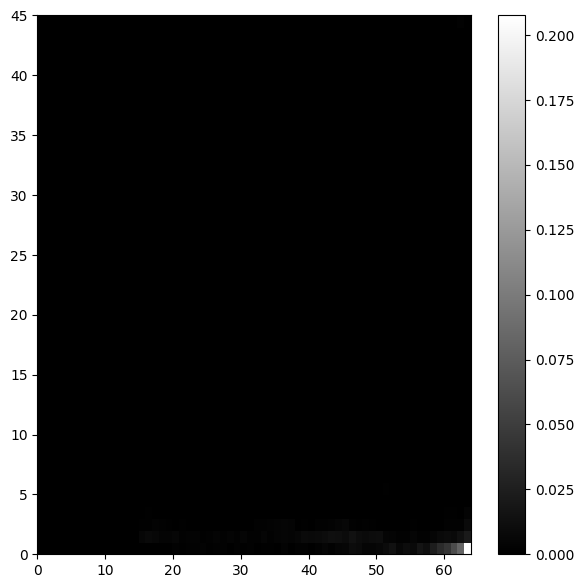

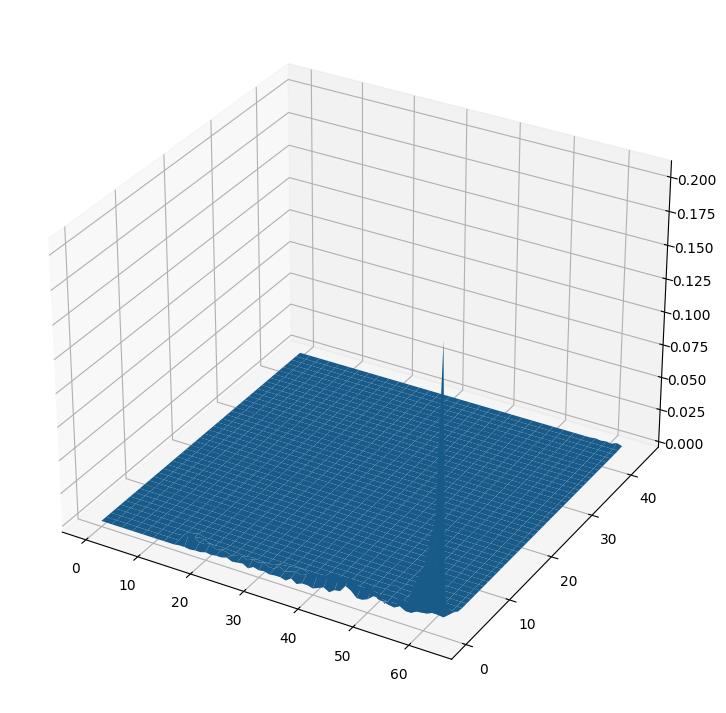

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,7))
plt.gray()
plt.pcolor(norm_HS_model)
plt.colorbar()
plt.show()

xx, yy = np.meshgrid(range(64), range(45))

plt.figure(figsize=(9,9))
ax = plt.subplot(1,1,1,projection='3d')
ax.plot_surface(xx, yy, norm_HS_model)
plt.show()

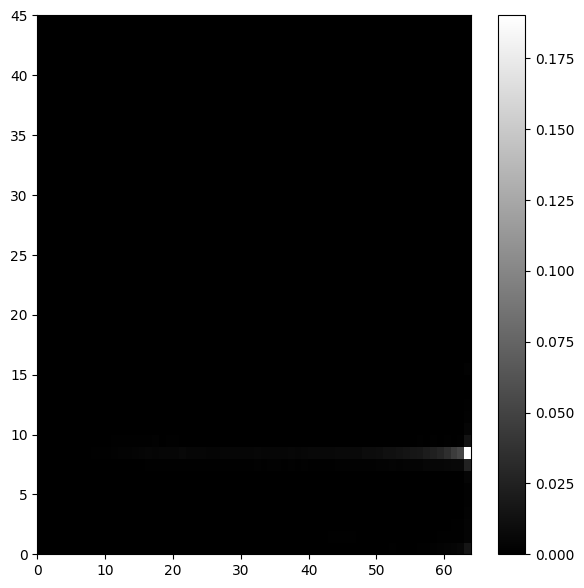

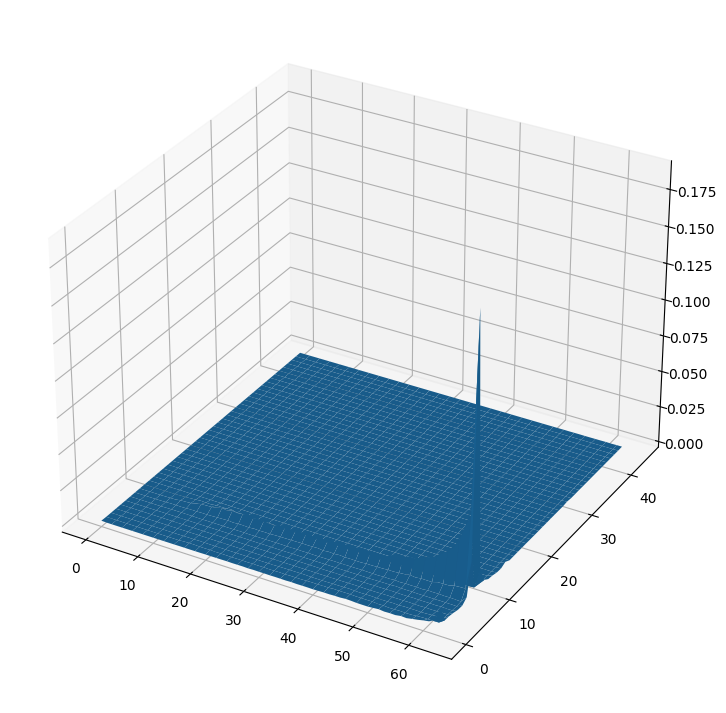

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,7))
plt.gray()
plt.pcolor(norm_src_HS_map)
plt.colorbar()
plt.show()

xx, yy = np.meshgrid(range(64), range(45))

plt.figure(figsize=(9,9))
ax = plt.subplot(1,1,1,projection='3d')
ax.plot_surface(xx, yy, norm_src_HS_map)
plt.show()